Getting input


In [99]:
def get_in():
    n = int(input("N: "))
    M = []
    l = list(map(int, input("L: ").split()))
    for i in range(n):
        M.append(l[i*n:i*n+n])
    return n, M
print(M)

[[5, 10, 3, 4], [8, 7, 49, 19], [6, 10, 9, 28], [6, 10, 39, 289]]


First phremones (1 / M[i][j])

In [159]:
def first_init(m):
    
    global ph, delta
    ph = []
    delta = [[0 for i in range(n)] for j in range(n)]
    
    for i in range(n):
        now = []
        for j in range(n):
            now.append(m * 1.0 / float(M[i][j]))
        ph.append(now)
    return ph
print(first_init(4), delta)

[[0.047619047619047616, 0.125, 0.04395604395604396, 0.08163265306122448, 0.0425531914893617, 0.14814814814814814, 0.13793103448275862, 0.06779661016949153, 0.26666666666666666, 0.10256410256410256, 0.06557377049180328, 0.21052631578947367, 0.2857142857142857, 0.08333333333333333, 0.047058823529411764, 0.05063291139240506, 0.10256410256410256, 0.057971014492753624, 0.041666666666666664, 0.06779661016949153, 0.07142857142857142, 0.058823529411764705, 0.05970149253731343, 0.14285714285714285, 0.14285714285714285, 0.08163265306122448, 0.07017543859649122, 0.16666666666666666, 0.21052631578947367, 0.05194805194805195, 0.14814814814814814, 0.12903225806451613, 0.08163265306122448, 0.05333333333333334, 0.16666666666666666, 0.047619047619047616, 0.4444444444444444, 0.2857142857142857, 0.0784313725490196, 0.05714285714285714, 0.6666666666666666, 0.11428571428571428, 0.13333333333333333, 0.125, 0.08, 0.06060606060606061, 0.047058823529411764, 0.04395604395604396, 0.2857142857142857, 0.0425531914

Using ants_move function to move m ants in the bipartite Graph (K(n,n)) M(agents vs tasks are the two parts of M and weight of each edge  between agent i and task j is M[i][j]). Every ant walks through graph with respect to the probability of his options(pheromone and cost of edge). options are restricted in a way that the ant can only go to the unvisited vertices so, at the end, ant will give us a circle in the Graph M, we take every other edge to form two matchings and return the minimum. 

so the output is a cycle with length 2n in graph and the answer is the minimum matching between {i, i+1} pairs (i = 2k) or {i, i+1} pairs (i = 2k + 1)
*example: [1, 2, 0, 0, 1, 2] there is two matchings: {(1,2), (0, 0), (1, 2)} and {(2, 0), (0, 1), (2, 1)}.


In [204]:
import bisect, random

# Moving an ant and updating delta
def ant(a, b):
    A = []
    B = []
    global path
    start = random.randint(0, n-1)
    path = [start]
    A = [start]
    for i in range(2*n-1):
        if i % 2 == 0:
            p = [0]
            temp = []
            for j in range(n):
                if j not in B:
                    p.append(p[-1] + (ph[start][j] ** a) * ((1.0 / float(M[start][j])) ** b))
                    temp.append(j)
            #print(p)
            p = [p[j] / p[-1] for j in range(len(p))]
            x = random.random() 
            next_vertx = temp[bisect.bisect(p, x)-1]
            """print(p)
            print(temp)
            print(x, "==> ", next_vertx)"""
            path.append(next_vertx)
            B.append(next_vertx)
            start = next_vertx
            
        else:
            p = [0]
            temp = []
            for j in range(n):
                if j not in A:
                    p.append(p[-1] + (ph[j][start] ** a) * ((1.0 / float(M[j][start])) ** b))
                    temp.append(j)
            #print(":DDD ", p)
            p = [p[j] / p[-1] for j in range(len(p))]
            x = random.random() 
            next_vertx = temp[bisect.bisect(p, x)-1]
            """print(":DDD ", p)
            print(":DDD ", temp)
            print(":DDD ", x, "==> ", next_vertx)"""
            path.append(next_vertx)
            A.append(next_vertx)
            start = next_vertx
            
    res = 0
    ans = 0
    for i in range(len(path)):
        if i % 2 == 0:
            res += M[path[i]][path[(i+1)%len(path)]]
        else:
            ans += M[path[(i+1)%len(path)]][path[i]]
            
    # Updating Delta pheromones
    global flag
    flag = (res < ans)
    for i in range(len(path)):
        if i % 2 == 0 and res < ans:
            delta[path[i]][path[(i+1)%len(path)]] += (1.0 / float(res)) * 5
        elif i%2 == 1 and ans < res:
            delta[path[(i+1)%len(path)]][path[i]] += (1.0 / float(ans)) * 5
    
    return min(res, ans)


def ants_move(m, a, b):
    res = -1
    for i in range(m):
        if res != -1:
            res = min (res, ant(a, b))
        else:
            res = ant(a, b)
    return res




In [65]:
# For the first sample ...
print(M)
print(ants_move(10, 0.1, 0.2))
print(delta)

[[5, 10, 3, 4], [8, 7, 49, 19], [6, 10, 9, 28], [6, 10, 39, 289]]
26
[[0.518000539828235, 0.5793372273881541, 0.7951349783801082, 0.6971402454641135], [0.562999281338358, 0.5892233896541443, 0.5116742305930285, 0.9257160894750806], [0.5335990044133292, 0.510715717678447, 0.7177146426555298, 0.8275836263133051], [0.9750141654806886, 0.910336656339866, 0.5650891394319446, 0.1391730298081117]]


In [89]:
def draw(progress):
    import matplotlib.pyplot as plt
    plt.plot(progress)
    plt.ylabel('Cost')
    plt.xlabel('Iteration')
    plt.show()

In [207]:
# Ant_main(number of ants, alpha, betha, Evaporation تبخیر, number of iterations)
def Ant_main(m, a, b, r, t, ):
    first_init(m)
    progress = []
    Best = sum([j for i in M for j in i])
    Best_path = []
    for _ in range(t):
        # reset delta
        delta = [[0 for i in range(n)] for j in range(n)]
        x = ants_move(m, a, b)
        if x < Best:
            Best_path = path
        #Put another round of phremon on the best path
        
        for i in range(len(path)):
            if i % 2 == 0 and flag == 1:
                delta[Best_path[i]][Best_path[(i+1)%len(Best_path)]] += (1.0 / float(Best)) * 10
            elif i%2 == 1 and flag == 0:
                delta[Best_path[(i+1)%len(Best_path)]][Best_path[i]] += (1.0 / float(Best)) * 10
        Best = min(Best, x)
        print(_, Best, x, end = '\r', flush=True)
        progress.append(Best)
        # Updating pheromones
        for i in range(n):
            for j in range(n):
                ph[i][j] *= (1 - r) 
                ph[i][j] += delta[i][j]
    draw(progress)
    print(Best_path)

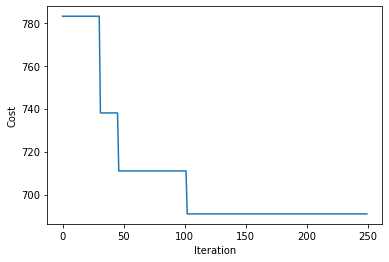

[147, 125, 187, 100, 124, 188, 70, 103, 53, 90, 154, 106, 23, 123, 181, 7, 185, 161, 64, 62, 198, 133, 117, 19, 152, 140, 48, 92, 98, 82, 162, 198, 91, 18, 46, 66, 15, 174, 129, 28, 136, 173, 94, 117, 193, 108, 82, 156, 118, 150, 28, 94, 38, 146, 155, 25, 161, 129, 6, 122, 11, 68, 142, 27, 18, 169, 69, 104, 99, 189, 25, 149, 132, 67, 26, 177, 165, 119, 189, 5, 138, 144, 175, 70, 5, 31, 110, 29, 139, 145, 57, 58, 163, 154, 37, 142, 167, 147, 43, 115, 14, 59, 178, 91, 56, 13, 192, 39, 55, 30, 36, 54, 168, 126, 8, 21, 119, 52, 67, 55, 79, 4, 128, 132, 51, 157, 150, 61, 13, 195, 176, 6, 93, 181, 182, 76, 96, 101, 1, 89, 72, 64, 16, 83, 141, 148, 105, 184, 145, 135, 144, 191, 121, 98, 146, 166, 148, 22, 76, 86, 153, 69, 74, 194, 75, 15, 59, 20, 172, 53, 180, 158, 12, 172, 116, 171, 166, 80, 42, 183, 88, 87, 29, 57, 135, 47, 120, 88, 78, 75, 50, 72, 35, 48, 127, 56, 169, 112, 197, 153, 103, 35, 22, 97, 71, 73, 86, 85, 61, 95, 170, 155, 195, 163, 27, 3, 45, 23, 95, 46, 81, 196, 60, 93, 2, 109

In [211]:
#n, M = get_in()
#print(M)
Ant_main(10, 10, 2, 0.01, 250)


with lower concideration of costs of edges, the first random ant cycles was far from 750 (around 10k) and after some try and error i find the best combination to start very close to 750 (execution time was around 10min)

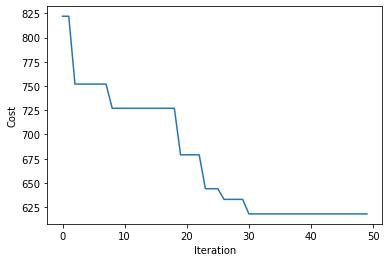

[195, 155, 170, 12, 34, 179, 37, 142, 167, 147, 43, 115, 14, 59, 98, 82, 162, 198, 91, 18, 46, 66, 15, 174, 129, 28, 136, 173, 94, 38, 42, 183, 191, 96, 174, 63, 107, 34, 95, 23, 33, 151, 48, 92, 114, 120, 19, 42, 123, 192, 164, 33, 54, 105, 16, 83, 132, 25, 149, 14, 100, 72, 35, 161, 64, 62, 198, 196, 166, 80, 6, 122, 102, 61, 150, 157, 51, 132, 32, 175, 80, 101, 96, 166, 148, 22, 56, 13, 55, 39, 192, 182, 106, 114, 68, 52, 119, 81, 173, 197, 8, 56, 127, 48, 24, 41, 67, 55, 79, 4, 128, 193, 57, 181, 93, 6, 176, 195, 13, 54, 36, 30, 77, 60, 0, 8, 92, 102, 31, 16, 60, 93, 2, 186, 109, 176, 179, 98, 146, 90, 53, 170, 153, 69, 25, 149, 135, 57, 29, 87, 88, 65, 63, 103, 70, 188, 124, 100, 187, 125, 26, 177, 165, 104, 78, 75, 152, 19, 117, 133, 62, 116, 178, 91, 116, 171, 154, 106, 23, 123, 181, 7, 185, 21, 28, 150, 168, 126, 133, 2, 58, 111, 90, 68, 11, 86, 76, 168, 20, 121, 163, 154, 158, 118, 131, 143, 27, 162, 155, 112, 197, 70, 175, 144, 138, 5, 189, 119, 156, 141, 134, 117, 193, 108, 

In [225]:
# Ant_main(number of ants, alpha, betha, Evaporation تبخیر, number of iterations)
def Ant_main(m, a, b, r, t, ):
    first_init(m)
    progress = []
    Best = sum([j for i in M for j in i])
    Best_path = []
    for _ in range(t):
        # reset delta
        delta = [[0 for i in range(n)] for j in range(n)]
        x = ants_move(m, a, b)
        if x < Best:
            Best_path = path
        #Put another round of phremon on the best path
        Best = min(Best, x)

        for i in range(len(path)):
            if i % 2 == 0 and flag == 1:
                delta[Best_path[i]][Best_path[(i+1)%len(Best_path)]] += (1.0 / float(Best)) * 100
            elif i%2 == 1 and flag == 0:
                delta[Best_path[(i+1)%len(Best_path)]][Best_path[i]] += (1.0 / float(Best)) * 100
        print(_, Best, x, end = '\r', flush=True)
        progress.append(Best)
        # Updating pheromones
        for i in range(n):
            for j in range(n):
                ph[i][j] *= (1 - r) 
                ph[i][j] += delta[i][j]
    draw(progress)
    print(Best_path)
    
import time
start_time = time.time()
Ant_main(10, 5, 2, 0.1, 50)
print("Running Time: ", time.time() - start_time)

This time i put more emphsize on adding phremone to the best cycle ... *running time : 53s

# 4th input
19193 in 50 iteration

N: 1000
L: 1720 2837 2531 795  299  91   3473 2110 1250 482  3311 2944 3910 3955 1105 3355 1497 1107 397  2430 2327 86   3442 2168 2365 3962 3780 1549 3616 656  2637 486  1165 3806 3066 744  1245 3819 2783 948  1819 3883 1255 2034 476  2989 2109 4000 3429 383  1454 2608 2120 1436 2205 1062 1579 635  3581 651  3444 2542 3836 3266 473  3060 3810 1363 1614 3506 331  1258 3413 2265 271  968  3778 1385 1806 2470 1422 3359 2348 3081 2242 501  2486 3599 3686 1088 954  2658 460  3620 2734 3    2297 1708 2750 1042 2439 1354 1383 2797 85   1935 666  1346 725  2110 1838 179  504  415  2994 2973 372  2868 1731 1095 1256 2118 2196 2792 2287 2639 2455 3092 1001 3108 209  276  3769 1655 2912 750  1039 1914 3339 3499 2779 1984 1981 1145 3223 3824 594  2206 1630 1562 1282 3258 758  2111 1151 3634 2364 3244 2639 2244 1839 2233 380  665  969  3200 670  2553 3584 1444 1636 1633 3802 3593 514  897  1633 964  3748 1338 1500 3920 3161 1020 2220 418  500  3198 3780 1694 3375 3976 901  3421 2150 1194 1144 1429

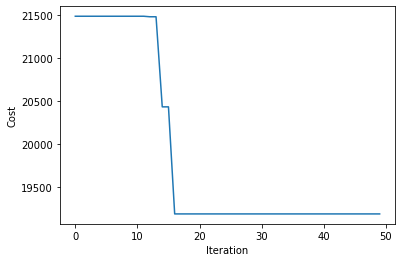

[687, 533, 789, 122, 818, 890, 360, 340, 460, 481, 602, 792, 229, 488, 322, 780, 513, 562, 60, 779, 767, 549, 830, 253, 288, 528, 38, 674, 598, 688, 694, 469, 806, 276, 99, 1, 936, 208, 969, 267, 130, 905, 651, 876, 739, 290, 51, 88, 182, 770, 732, 508, 263, 416, 678, 192, 178, 280, 613, 491, 307, 177, 738, 550, 377, 951, 579, 374, 982, 512, 107, 68, 535, 490, 8, 450, 981, 894, 759, 639, 871, 353, 896, 254, 554, 554, 980, 317, 628, 678, 339, 584, 363, 19, 445, 883, 616, 867, 700, 708, 879, 609, 995, 833, 621, 817, 834, 385, 894, 356, 432, 903, 257, 505, 67, 676, 313, 709, 221, 304, 282, 723, 740, 573, 359, 113, 106, 451, 481, 697, 240, 500, 323, 790, 115, 569, 224, 165, 201, 586, 592, 863, 679, 784, 474, 146, 877, 17, 848, 757, 436, 947, 165, 928, 374, 788, 78, 805, 88, 222, 212, 54, 911, 664, 974, 982, 588, 203, 544, 460, 943, 335, 496, 22, 5, 349, 500, 383, 928, 79, 343, 334, 716, 37, 764, 832, 643, 288, 14, 964, 371, 845, 328, 51, 242, 758, 800, 291, 57, 392, 897, 969, 174, 496, 361

In [226]:
import time
n, M = get_in()
#print(M)
start_time = time.time()
Ant_main(10, 5, 2, 0.1, 50)
print("Running Time: ", time.time() - start_time)